# Graphene

This example demonstrates the calculations of density of states (DOS) and transmission values for a two-probe graphene.

## Import Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import junpy as jp
from junpy.factory import nanodcal
%config InlineBackend.figure_formats = ['svg']
%config InlineBackend.rc = {'font.size': 12}

## Load Device

In [2]:
filename = (
    'jpdataset/nanodcal/twoprobe_graphene/'
    'LDA_SP/sys_1x2/v0.00/NanodcalStructObject.mat')
device = nanodcal.load_nanodcal_device(filename)

## Calculate Density of States

Since graphene has a two-dimensional structure, we need to integrate the k-space. In this example, the transport direction is along the $y$ direction, so we integrate the k-space along the $x$ direction. The object `jp.SymmetryKspaceSampling((n1, n2, n3))` specifies the number of k-points to be used along the reciprocal lattice vectors $b_1$, $b_2$, and $b_3$, respectively. Note that these calculations become time-consuming due to the integration.

In [4]:
calcr_dos = jp.DensityOfStates(
    device=device,
    energies=np.linspace(-4, 4, 81),
    kpoints=jp.SymmetryKspaceSampling((101,1,1)),
    etaSigma=0.05,
    etaGF=0.05)
jp.run(calcr_dos, savefile=False)

            JunPy version---------------------------: 0.15.0.post29+ga5b3260
            Parallelization information
                BLAS Vendor-----------------------------: MKL
                Total number of MPI processes-----------: 1
                OMP_NUM_THREADS-------------------------: 1
                MKL_NUM_THREADS-------------------------: unset
                OPENBLAS_NUM_THREADS--------------------: unset
            Calculating density of states... (2024-08-15 21:11:44)
                Device information
                    bias (mu2-mu1)--------------------------: 0.0
                    central.numberOfSites-------------------: 8
                    central.spinType------------------------: SpinType.CollinearSpin
                    lead1.numberOfSites---------------------: 8
                    lead1.spinType--------------------------: SpinType.CollinearSpin
                    lead1.direction-------------------------: -1
                    lead1.temperature-----

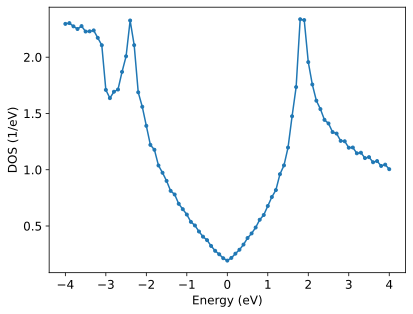

In [8]:
# shape: (#kpoints, #energies, #spin)
dos = calcr_dos.densityOfStates(spin='sum')

plt.plot(calcr_dos.energies, dos[0,:,0], '.-')
plt.xlabel('Energy (eV)')
plt.ylabel('DOS (1/eV)')
plt.show()

## Calculate Transmission

In [10]:
calcr_trans = jp.Transmission(
    device=device,
    energies=np.linspace(-4, 4, 81),
    kpoints=jp.SymmetryKspaceSampling((101,1,1)),
    etaSigma=0.05,
    etaGF=0.05)
jp.run(calcr_trans, savefile=False)

            JunPy version---------------------------: 0.15.0.post29+ga5b3260
            Parallelization information
                BLAS Vendor-----------------------------: MKL
                Total number of MPI processes-----------: 1
                OMP_NUM_THREADS-------------------------: 1
                MKL_NUM_THREADS-------------------------: unset
                OPENBLAS_NUM_THREADS--------------------: unset
            Calculating transmission... (2024-08-15 21:54:34)
                Device information
                    bias (mu2-mu1)--------------------------: 0.0
                    central.numberOfSites-------------------: 8
                    central.spinType------------------------: SpinType.CollinearSpin
                    lead1.numberOfSites---------------------: 8
                    lead1.spinType--------------------------: SpinType.CollinearSpin
                    lead1.direction-------------------------: -1
                    lead1.temperature----------

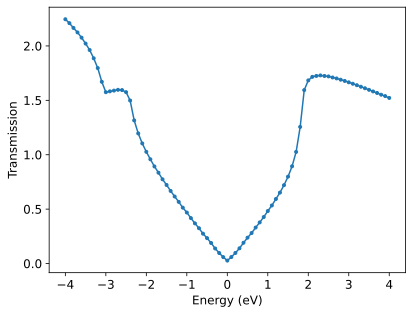

In [12]:
# shape: (#kpoints, #energies, #spin)
trans = calcr_trans.transmission(spin='sum')

plt.plot(calcr_trans.energies, trans[0,:,0], '.-')
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission')
plt.show()